In [1]:
#tutorial of prophet python 
#https://www.youtube.com/watch?v=2vF2xTUXJwM
import pandas as pd 
from prophet import Prophet

#not in used yet 
import matplotlib.pyplot as plt

#evaluate the model 
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error, mean_squared_error

Importing plotly failed. Interactive plots will not work.


In [2]:
#reading all the data 
building0 = pd.read_csv("building 0.csv")

In [3]:
building0

,Unnamed: 0,series_value,datetime,Year,Month,Day_of_Month,Hour,minutes,series_name
0,2,283.8,2016-07-03 22:00:00,2016,7,3,22,0,Building0
1,6,606.0,2016-07-03 23:00:00,2016,7,3,23,0,Building0
2,10,306.0,2016-07-04 00:00:00,2016,7,4,0,0,Building0
3,14,317.8,2016-07-04 01:00:00,2016,7,4,1,0,Building0
4,18,300.8,2016-07-04 02:00:00,2016,7,4,2,0,Building0
...,...,...,...,...,...,...,...,...,...
26082,151766,137.6,2020-10-31 19:00:00,2020,10,31,19,0,Building0
26083,151770,141.4,2020-10-31 20:00:00,2020,10,31,20,0,Building0
26084,151774,138.5,2020-10-31 21:00:00,2020,10,31,21,0,Building0
26085,151778,123.0,2020-10-31 22:00:00,2020,10,31,22,0,Building0


In [4]:
building0['datetime']=pd.to_datetime(building0['datetime'], format='%Y-%m-%d %H:%M:%S')

building0= building0.set_index('datetime')

building0= building0.asfreq('H')

<AxesSubplot:xlabel='datetime'>

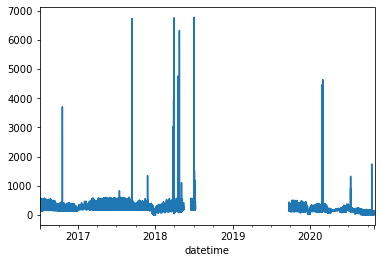

In [5]:
building0["series_value"].plot()

In [6]:
end_train='2019-12-31 23:00'

start_test='2020-01-01 00:00'

building0train = building0.loc[:end_train,:]

building0test=building0.loc[start_test:, :]

In [7]:
building0train

,Unnamed: 0,series_value,Year,Month,Day_of_Month,Hour,minutes,series_name
datetime,,,,,,,,
2016-07-03 22:00:00,2.0,283.8,2016.0,7.0,3.0,22.0,0.0,Building0
2016-07-03 23:00:00,6.0,606.0,2016.0,7.0,3.0,23.0,0.0,Building0
2016-07-04 00:00:00,10.0,306.0,2016.0,7.0,4.0,0.0,0.0,Building0
2016-07-04 01:00:00,14.0,317.8,2016.0,7.0,4.0,1.0,0.0,Building0
2016-07-04 02:00:00,18.0,300.8,2016.0,7.0,4.0,2.0,0.0,Building0
...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,122486.0,157.7,2019.0,12.0,31.0,19.0,0.0,Building0
2019-12-31 20:00:00,122490.0,162.0,2019.0,12.0,31.0,20.0,0.0,Building0
2019-12-31 21:00:00,122494.0,155.2,2019.0,12.0,31.0,21.0,0.0,Building0


In [8]:
building0test

,Unnamed: 0,series_value,Year,Month,Day_of_Month,Hour,minutes,series_name
datetime,,,,,,,,
2020-01-01 00:00:00,122506.0,66.9,2020.0,1.0,1.0,0.0,0.0,Building0
2020-01-01 01:00:00,122510.0,51.4,2020.0,1.0,1.0,1.0,0.0,Building0
2020-01-01 02:00:00,122514.0,30.7,2020.0,1.0,1.0,2.0,0.0,Building0
2020-01-01 03:00:00,122518.0,26.8,2020.0,1.0,1.0,3.0,0.0,Building0
2020-01-01 04:00:00,122522.0,36.6,2020.0,1.0,1.0,4.0,0.0,Building0
...,...,...,...,...,...,...,...,...
2020-10-31 19:00:00,151766.0,137.6,2020.0,10.0,31.0,19.0,0.0,Building0
2020-10-31 20:00:00,151770.0,141.4,2020.0,10.0,31.0,20.0,0.0,Building0
2020-10-31 21:00:00,151774.0,138.5,2020.0,10.0,31.0,21.0,0.0,Building0


In [9]:
train_b0 = building0train.reset_index()[["datetime","series_value"]]
train_b0.columns=["ds","y"]
train_b0

,ds,y
0,2016-07-03 22:00:00,283.8
1,2016-07-03 23:00:00,606.0
2,2016-07-04 00:00:00,306.0
3,2016-07-04 01:00:00,317.8
4,2016-07-04 02:00:00,300.8
...,...,...
30621,2019-12-31 19:00:00,157.7
30622,2019-12-31 20:00:00,162.0
30623,2019-12-31 21:00:00,155.2
30624,2019-12-31 22:00:00,138.6


In [10]:
model_b0 = Prophet()
model_b0.fit(train_b0)

In [11]:
future_b0 = model_b0.make_future_dataframe(periods=7320,freq="H")

In [12]:
future_b0

,ds
0,2016-07-03 22:00:00
1,2016-07-03 23:00:00
2,2016-07-04 00:00:00
3,2016-07-04 01:00:00
4,2016-07-04 02:00:00
...,...
37941,2020-10-31 19:00:00
37942,2020-10-31 20:00:00
37943,2020-10-31 21:00:00
37944,2020-10-31 22:00:00


In [13]:
forecast_b0 = model_b0.predict(future_b0)

In [14]:
forecast_b0
#forecast_b0[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-7320:] 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-07-03 22:00:00,230.896498,104.348177,420.877376,230.896498,230.896498,39.248277,39.248277,39.248277,11.299864,...,-12.891038,-12.891038,-12.891038,40.839450,40.839450,40.839450,0.0,0.0,0.0,270.144775
1,2016-07-03 23:00:00,230.904496,111.473964,434.456945,230.904496,230.904496,38.232693,38.232693,38.232693,8.775223,...,-11.391758,-11.391758,-11.391758,40.849229,40.849229,40.849229,0.0,0.0,0.0,269.137190
2,2016-07-04 00:00:00,230.912495,99.320902,419.993832,230.912495,230.912495,28.102253,28.102253,28.102253,-2.878596,...,-9.878107,-9.878107,-9.878107,40.858956,40.858956,40.858956,0.0,0.0,0.0,259.014748
3,2016-07-04 01:00:00,230.920494,95.594106,409.628269,230.920494,230.920494,17.419537,17.419537,17.419537,-15.093676,...,-8.355420,-8.355420,-8.355420,40.868633,40.868633,40.868633,0.0,0.0,0.0,248.340031
4,2016-07-04 02:00:00,230.928492,86.353001,404.435742,230.928492,230.928492,14.983207,14.983207,14.983207,-19.066012,...,-6.829041,-6.829041,-6.829041,40.878260,40.878260,40.878260,0.0,0.0,0.0,245.911700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37941,2020-10-31 19:00:00,202.730925,-85.488637,319.108678,72.582066,320.986275,-77.695537,-77.695537,-77.695537,-35.186545,...,-32.756949,-32.756949,-32.756949,-9.752043,-9.752043,-9.752043,0.0,0.0,0.0,125.035387
37942,2020-10-31 20:00:00,202.728844,-66.329807,348.731600,72.514732,321.003033,-57.225480,-57.225480,-57.225480,-14.402536,...,-33.004765,-33.004765,-33.004765,-9.818179,-9.818179,-9.818179,0.0,0.0,0.0,145.503363
37943,2020-10-31 21:00:00,202.726762,-55.953903,355.993248,72.447398,321.019792,-40.607944,-40.607944,-40.607944,2.450561,...,-33.174011,-33.174011,-33.174011,-9.884494,-9.884494,-9.884494,0.0,0.0,0.0,162.118819
37944,2020-10-31 22:00:00,202.724681,-41.864244,368.994194,72.380064,321.036551,-31.914281,-31.914281,-31.914281,11.299864,...,-33.263160,-33.263160,-33.263160,-9.950985,-9.950985,-9.950985,0.0,0.0,0.0,170.810400


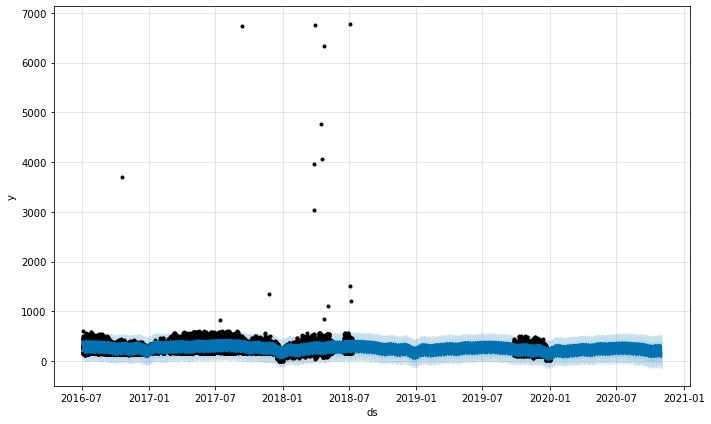

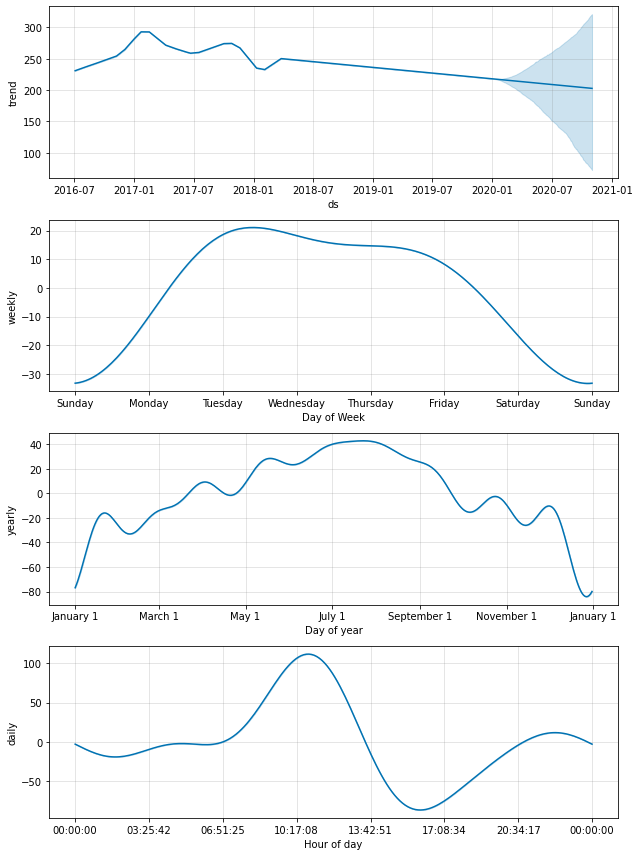

In [15]:
# plot the prediction 
fig= model_b0.plot(forecast_b0)
#plot predictions 
fig= model_b0.plot_components(forecast_b0)

In [16]:
forecast_b0["additive_terms"]
additive_terms =  pd.DataFrame(forecast_b0["additive_terms"])
additive_terms

,additive_terms
0,39.248277
1,38.232693
2,28.102253
3,17.419537
4,14.983207
...,...
37941,-77.695537
37942,-57.225480
37943,-40.607944
37944,-31.914281


In [17]:
building0["series_value"]
actual_value = pd.DataFrame(building0.reset_index()["series_value"])
actual_value

,series_value
0,283.8
1,606.0
2,306.0
3,317.8
4,300.8
...,...
37941,137.6
37942,141.4
37943,138.5
37944,123.0


In [18]:
sub =actual_value["series_value"]-additive_terms["additive_terms"]

output =  pd.DataFrame(building0.reset_index()["datetime"])
output["subtraction"] = sub
output["additive_terms"] = forecast_b0["additive_terms"]
output["actual_value"] = actual_value["series_value"]
output = output.dropna()

output 


,datetime,subtraction,additive_terms,actual_value
0,2016-07-03 22:00:00,244.551723,39.248277,283.8
1,2016-07-03 23:00:00,567.767307,38.232693,606.0
2,2016-07-04 00:00:00,277.897747,28.102253,306.0
3,2016-07-04 01:00:00,300.380463,17.419537,317.8
4,2016-07-04 02:00:00,285.816793,14.983207,300.8
...,...,...,...,...
37941,2020-10-31 19:00:00,215.295537,-77.695537,137.6
37942,2020-10-31 20:00:00,198.625480,-57.225480,141.4
37943,2020-10-31 21:00:00,179.107944,-40.607944,138.5
37944,2020-10-31 22:00:00,154.914281,-31.914281,123.0


In [19]:
output.to_csv("b0_actual_additive.csv",index=False)